In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output



In [2]:
# Load dataset
df = pd.read_csv("imdb_top_1000.csv")

# Preview first rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'imdb_top_1000.csv'

In [ ]:
# Clean Released_Year column
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df = df.dropna(subset=["Released_Year"])
df["Released_Year"] = df["Released_Year"].astype(int)

# Clean Gross column (fix warning using raw string)
if "Gross" in df.columns:
    df["Gross"] = df["Gross"].replace(r"[\$,]", "", regex=True).astype(float)

# Check cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 132.7+ KB


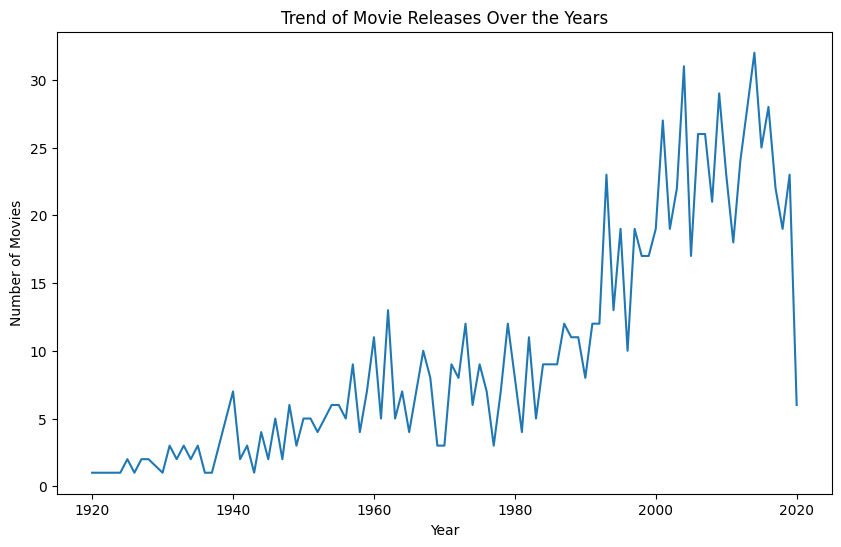

In [ ]:
plt.figure(figsize=(10,6))
df["Released_Year"].value_counts().sort_index().plot(kind="line")
plt.title("Trend of Movie Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


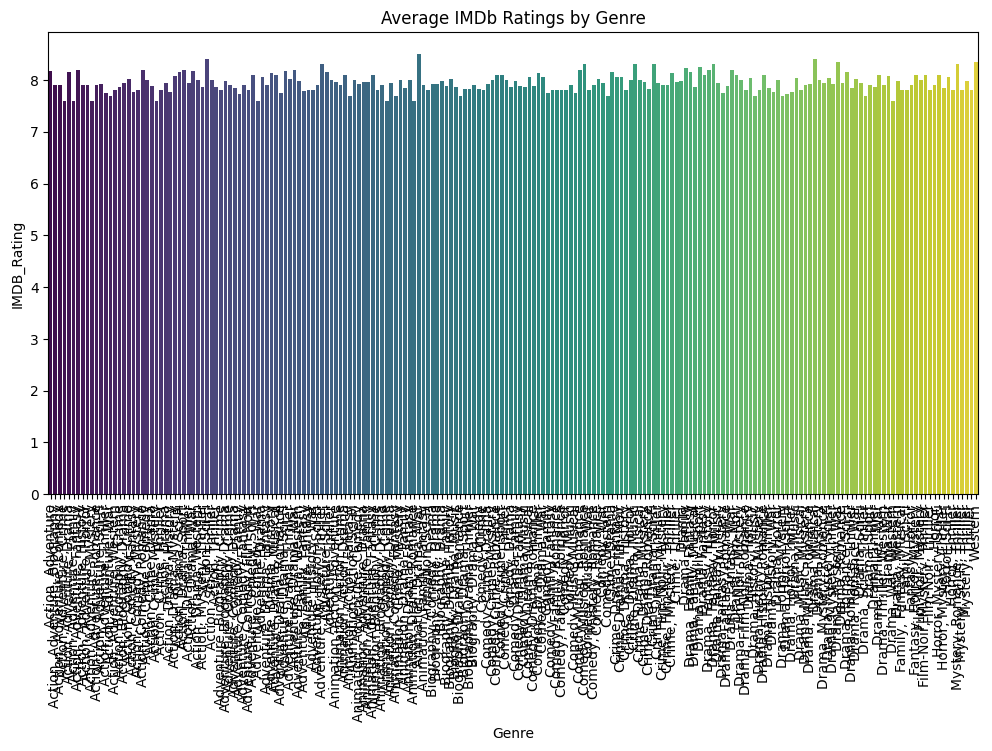

In [ ]:
# Average IMDb ratings by Genre
avg_ratings = df.groupby("Genre")["IMDB_Rating"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_ratings, x="Genre", y="IMDB_Rating", hue="Genre", legend=False, palette="viridis")
plt.title("Average IMDb Ratings by Genre")
plt.xticks(rotation=90)
plt.show()


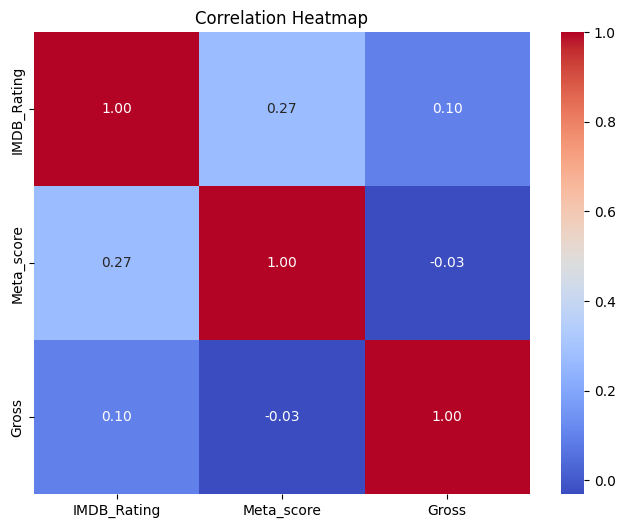

In [ ]:
corr = df[["IMDB_Rating", "Meta_score", "Gross"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




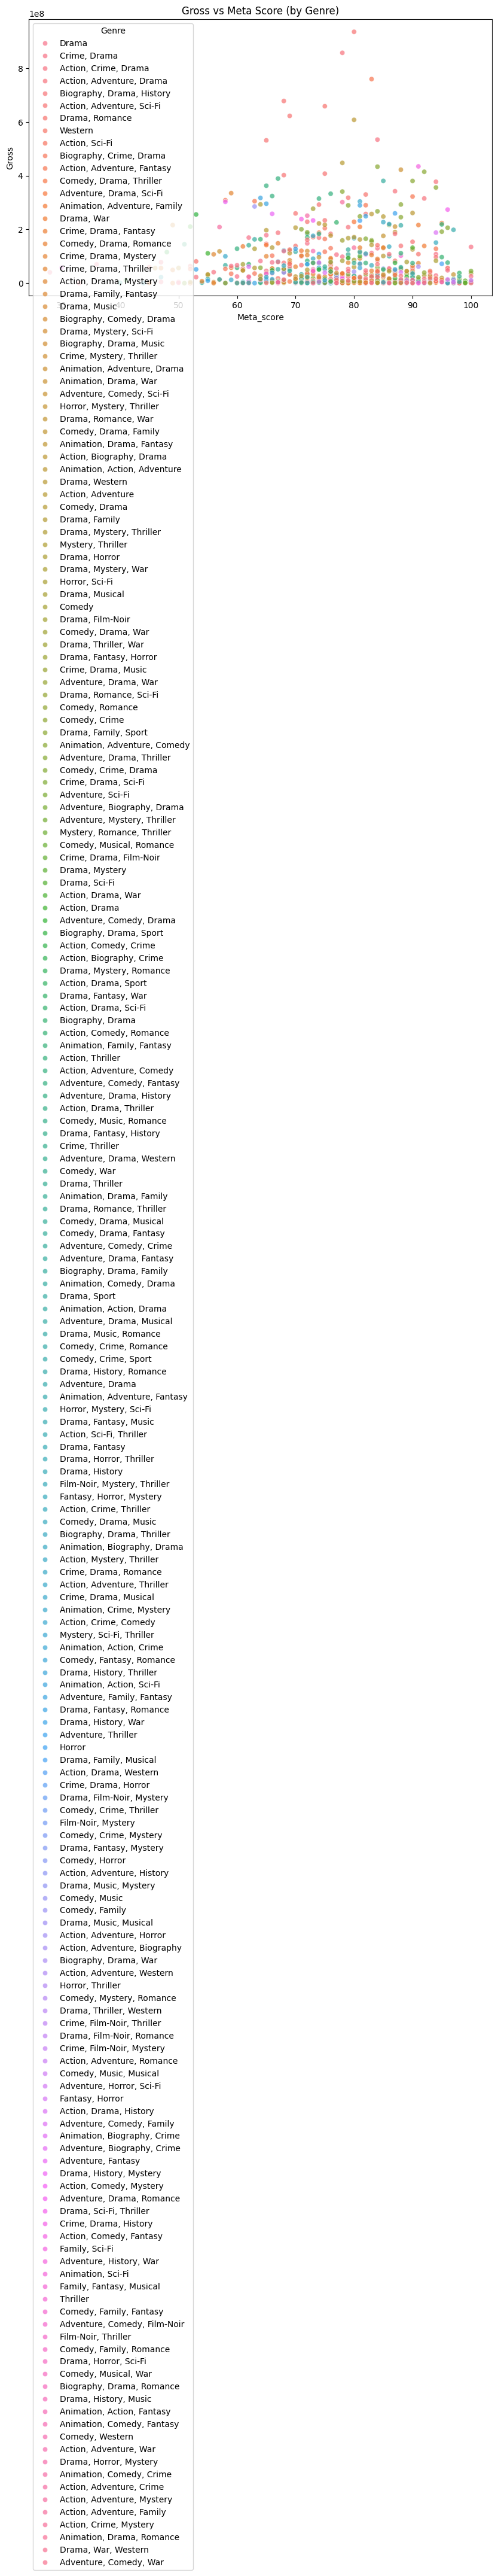

In [ ]:
if "Gross" in df.columns and "Meta_score" in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x="Meta_score", y="Gross", hue="Genre", alpha=0.7)
    plt.title("Gross vs Meta Score (by Genre)")
    plt.show()



In [ ]:
# Create Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("🎬 IMDb Top 1000 Movie Analytics Dashboard"),

    # Genre filter
    dcc.Dropdown(
        id="genre_filter",
        options=[{"label": g, "value": g} for g in df["Main_Genre"].unique()],
        multi=True,
        placeholder="Select Genre(s)"
    ),

    # Year slider
    dcc.Slider(
        id="year_slider",
        min=int(df["Released_Year"].min()),
        max=int(df["Released_Year"].max()),
        value=int(df["Released_Year"].min()),
        marks={str(year): str(year) for year in range(int(df["Released_Year"].min()), int(df["Released_Year"].max())+1, 10)},
        step=1
    ),

    # Scatter plot
    dcc.Graph(id="scatter_plot")
])

@app.callback(
    Output("scatter_plot", "figure"),
    [Input("genre_filter", "value"),
     Input("year_slider", "value")]
)
def update_scatter(selected_genres, selected_year):
    filtered_df = df[df["Released_Year"] >= selected_year]

    if selected_genres:
        filtered_df = filtered_df[filtered_df["Main_Genre"].isin(selected_genres)]

    fig = px.scatter(
        filtered_df, x="Meta_score", y="Gross",
        color="Main_Genre",
        hover_data=["Series_Title", "IMDB_Rating"],
        title=f"Gross vs Meta Score (from {selected_year} onwards)"
    )
    return fig

app.run_server(debug=True)



KeyError: 'Main_Genre'